## Implementing Digit Recognizer Neural Network

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 196, 4, 1)
x_test = x_test.reshape(x_test.shape[0], 196, 4, 1)
input_shape = (196, 4, 1)

In [ ]:
x_train.shape

(60000, 196, 4, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(196, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 114s 60ms/step - loss: 0.2000 - accuracy: 0.9387
Epoch 2/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1081 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0830 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0687 - accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0583 - accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0526 - accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0437 - accuracy: 0.9853
Epoch 8/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0409 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0371 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0822 - accuracy: 0.9798


[0.08216805756092072, 0.9797999858856201]

1/1 [==============================] - 0s 27ms/step
3


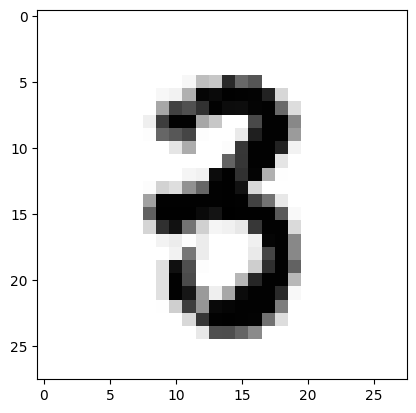

In [ ]:
import matplotlib.pyplot as plt
image_index = 2853
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 196, 4, 1))
print(pred.argmax())

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))

313/313 [==============================] - 4s 12ms/step


In [ ]:
confusion

array([[ 974,    0,    2,    0,    1,    0,    1,    1,    0,    1],
       [   0, 1130,    3,    0,    0,    0,    1,    0,    1,    0],
       [   1,    0, 1015,    1,    4,    0,    0,    8,    3,    0],
       [   1,    0,    8,  988,    0,    4,    0,    3,    2,    4],
       [   0,    0,    1,    0,  966,    0,    3,    0,    0,   12],
       [   4,    1,    1,   22,    0,  848,    4,    0,    5,    7],
       [   3,    2,    2,    0,    2,    3,  941,    0,    5,    0],
       [   1,    5,    6,    1,    5,    0,    0,  997,    5,    8],
       [   4,    0,    5,    3,    2,    3,    2,    3,  951,    1],
       [   1,    3,    1,    3,   11,    0,    0,    2,    0,  988]])

In [ ]:
type(confusion)

numpy.ndarray

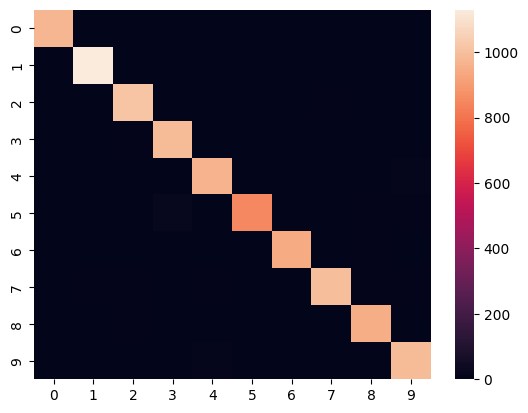

In [ ]:
import seaborn as sn
hm = sn.heatmap(data = confusion)